In [ ]:
import torch
import torch.nn as nn
from torchvision.transforms import transforms
import numpy as np
from torch.autograd import Variable
from torchvision.models import squeezenet1_1
import torch.functional as F
from io import open
import os
from PIL import Image
import pathlib
import glob
import cv2
from google.colab.patches import cv2_imshow
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image as IPyImage
from six import BytesIO
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img = image.load_img("/content/drive/MyDrive/insects/Bee/02a5af8df5c5.jpg")

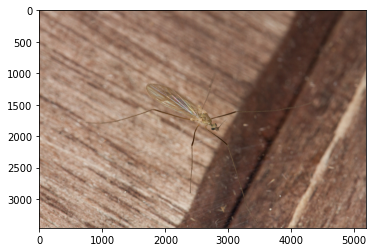

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/insects/Bee/02a5af8df5c5.jpg").shape

(3456, 5184, 3)

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation =ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/insects',
                                          target_size = (200,200),
                                          batch_size=5,
                                          class_mode = 'binary')
validation_dataset = train.flow_from_directory('/content/drive/MyDrive/insects',
                                          target_size = (200,200),
                                          batch_size=5,
                                          class_mode = 'binary')


Found 102 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'Bee': 0, 'Spider': 1}

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ])

In [ ]:
model.compile(loss= 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [ ]:
model_fit= model.fit(train_dataset,
                     steps_per_epoch=3,
                     epochs=5,
                     validation_data=validation_dataset)

Epoch 1/5
3/3 [==============================] - 10s 5s/step - loss: 1.0118 - accuracy: 0.4000 - val_loss: 0.6880 - val_accuracy: 0.5196
Epoch 2/5
3/3 [==============================] - 10s 4s/step - loss: 0.5384 - accuracy: 0.7333 - val_loss: 2.5536 - val_accuracy: 0.4902
Epoch 3/5
3/3 [==============================] - 10s 5s/step - loss: 1.4567 - accuracy: 0.5333 - val_loss: 0.6763 - val_accuracy: 0.4902
Epoch 4/5
3/3 [==============================] - 10s 4s/step - loss: 0.6235 - accuracy: 0.6667 - val_loss: 0.7735 - val_accuracy: 0.5000
Epoch 5/5
3/3 [==============================] - 10s 5s/step - loss: 1.0884 - accuracy: 0.2667 - val_loss: 0.7190 - val_accuracy: 0.4902


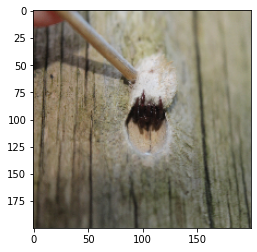

This is a Spider


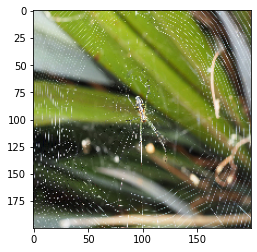

This is a Spider


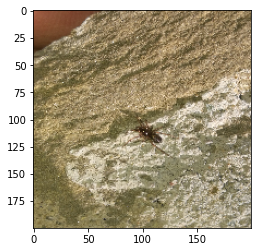

This is a Spider


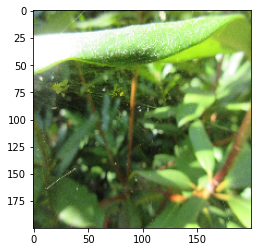

This is a Spider


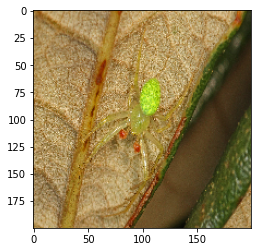

This is a Spider


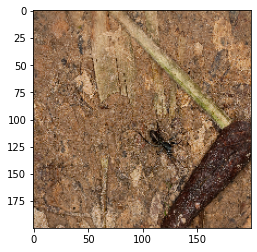

This is a Spider


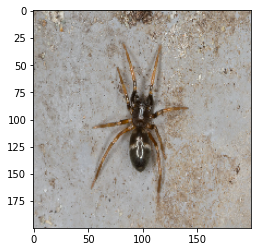

This is a Spider


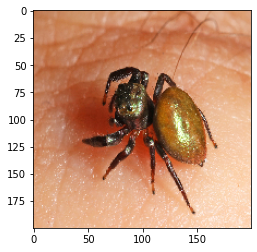

This is a Bee


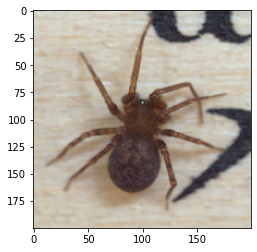

This is a Bee


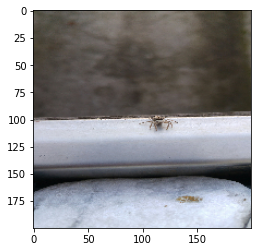

This is a Spider


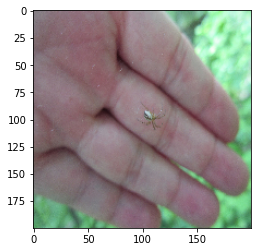

This is a Spider


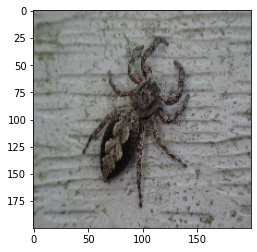

This is a Spider


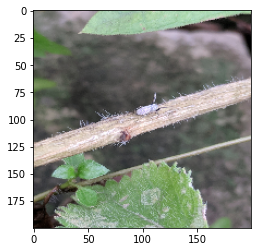

This is a Spider


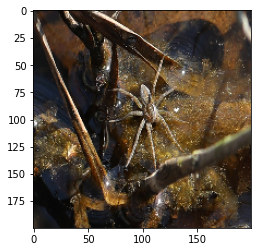

This is a Spider


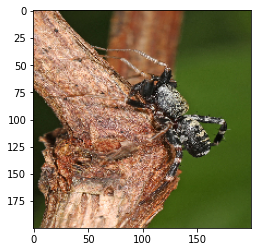

This is a Spider


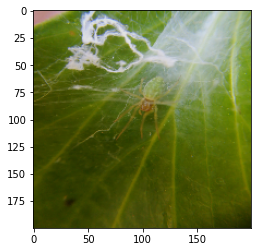

This is a Spider


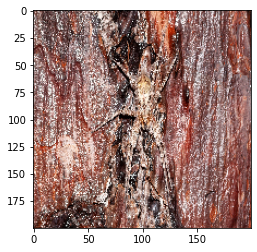

This is a Spider


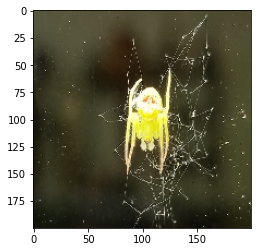

This is a Spider


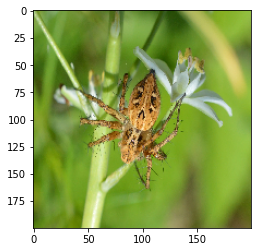

This is a Spider


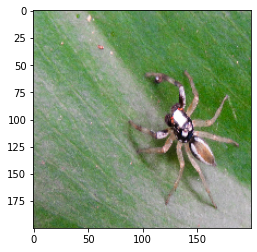

This is a Spider


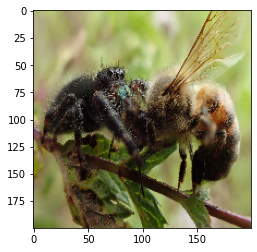

This is a Spider


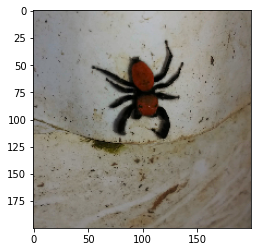

This is a Spider


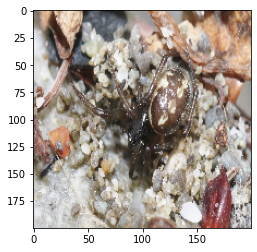

This is a Spider


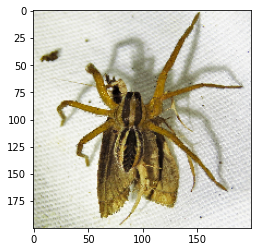

This is a Spider


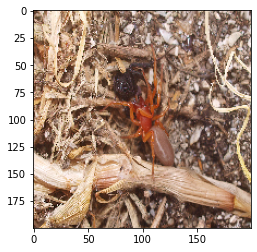

This is a Spider


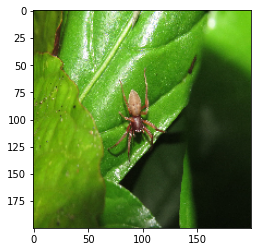

This is a Spider


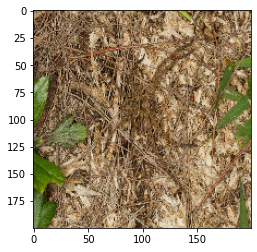

This is a Spider


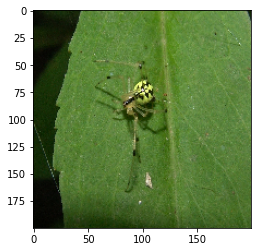

This is a Spider


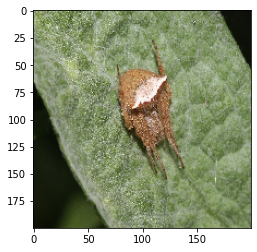

This is a Spider


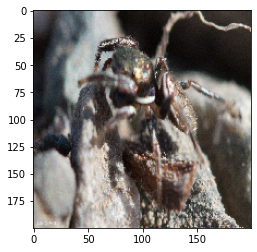

This is a Spider


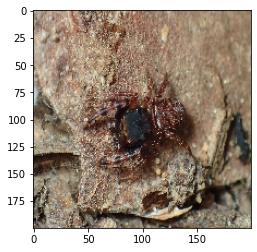

This is a Spider


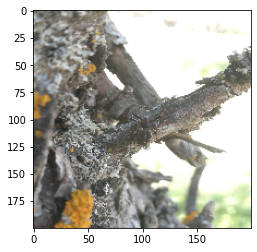

This is a Spider


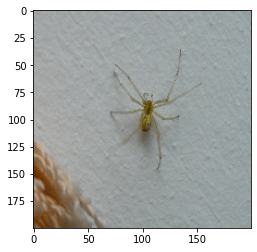

This is a Bee


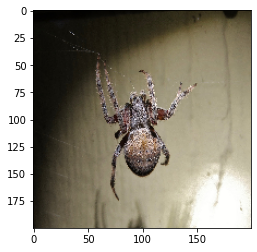

This is a Spider


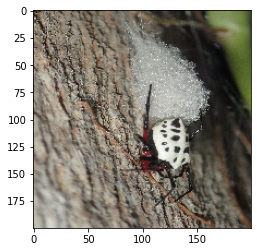

This is a Spider


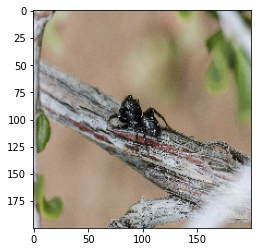

This is a Spider


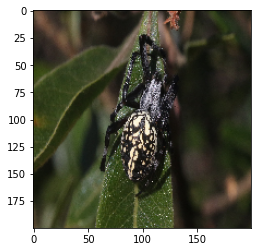

This is a Spider


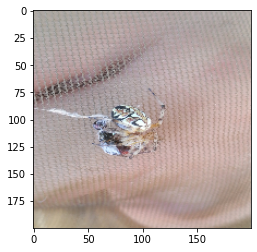

This is a Bee


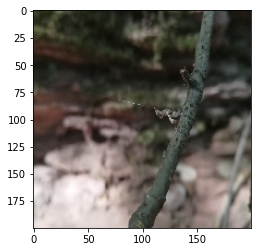

This is a Spider


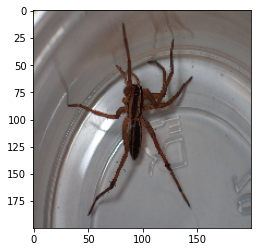

This is a Spider


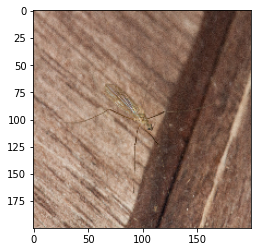

This is a Spider


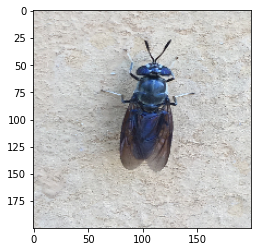

This is a Bee


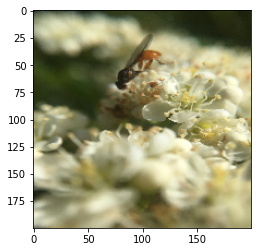

This is a Spider


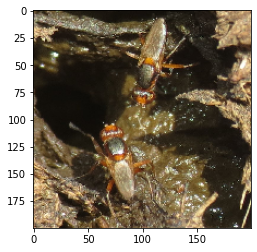

This is a Spider


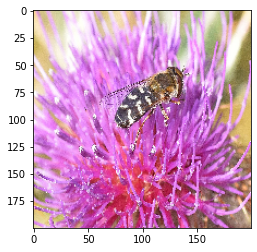

This is a Bee


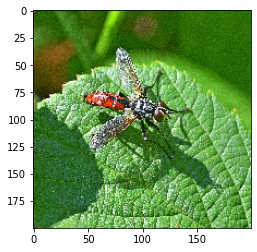

This is a Spider


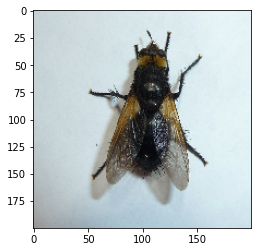

This is a Bee


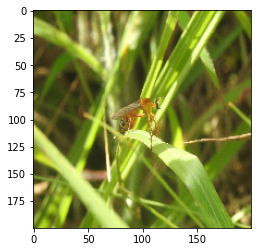

This is a Spider


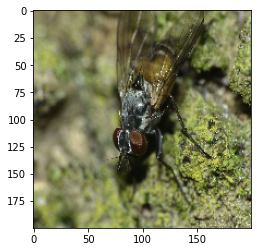

This is a Spider


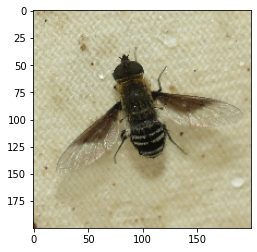

This is a Spider


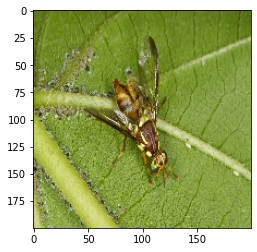

This is a Spider


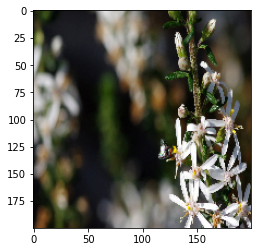

This is a Spider


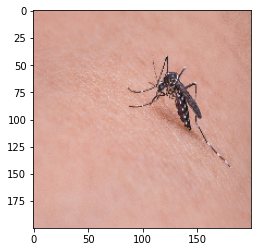

This is a Bee


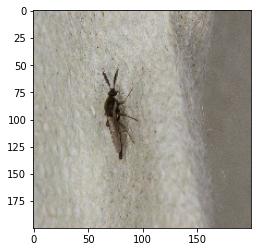

This is a Bee


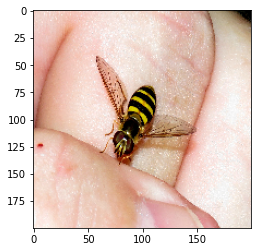

This is a Bee


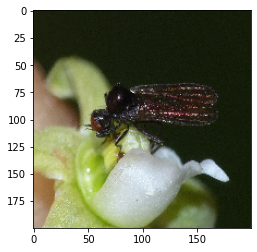

This is a Spider


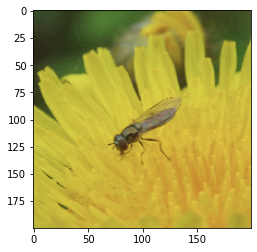

This is a Spider


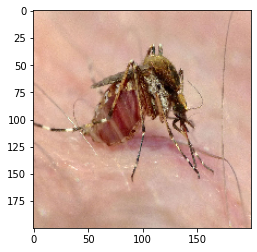

This is a Bee


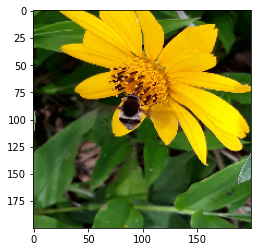

This is a Spider


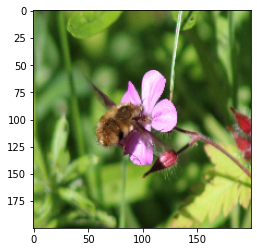

This is a Spider


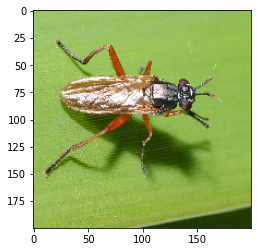

This is a Spider


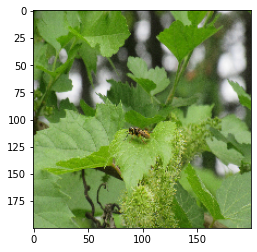

This is a Spider


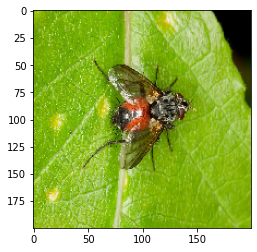

This is a Spider


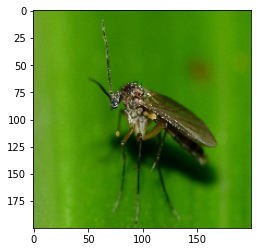

This is a Bee


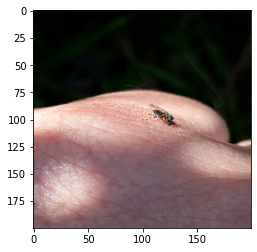

This is a Spider


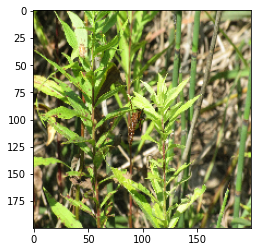

This is a Spider


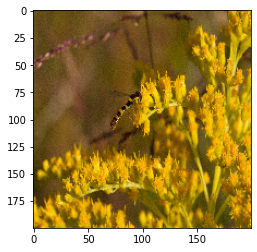

This is a Spider


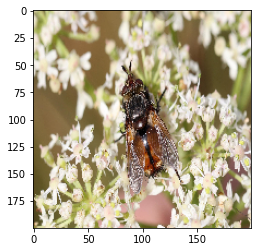

This is a Spider


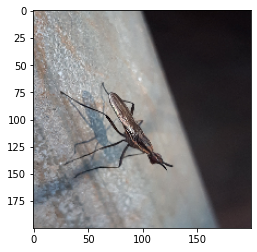

This is a Spider


In [ ]:
dir_path = '/content/drive/MyDrive/pred'
# dir_path = '/content/drive/MyDrive/Insects-20211020T071204Z-002/ran'

for i in os.listdir(dir_path):
     img = image.load_img(dir_path+'//'+ i,target_size=(200,200))
     plt.imshow(img)
     plt.show()
     X=image.img_to_array(img)
     X = np.expand_dims(X,axis=0)
     images = np.vstack([X])
     val= model.predict(images)
     if val == 0:
          print("This is a Bee")
     else:
          print("This is a Spider")